In [1]:
from FedAvg.fed_avg import FederatedAveraging
from SCAFFOLD.scaffold import Scaffold

In [2]:
fa = FederatedAveraging(model_params={
    'input_dim': 784,
    'hidden_dim': 200,
    'output_dim': 10,
    'hidden_layers_num': 2
}, device="cpu")
fa.prepare()

fa.train()

START TRAINING...
--------------------
Round: 1
Sending global weights to clients...
Clients training...


100%|██████████| 20/20 [00:03<00:00,  5.36it/s]


Aggregating clients weights...
Testing server model...
Global Model Accuracy: 44.06%
--------------------
--------------------
Round: 2
Sending global weights to clients...
Clients training...


 30%|███       | 6/20 [00:01<00:02,  5.78it/s]Process SpawnPoolWorker-2:
Process SpawnPoolWorker-1:
 30%|███       | 6/20 [00:01<00:02,  5.12it/s]Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml_39/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml_39/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml_39/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml_39/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml_39/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
Traceback (most recent call last):
  File "/opt/homebrew/Caskroo

KeyboardInterrupt: 

In [20]:
fa_logs = [
    client.logs
    for client in fa.server.clients
]

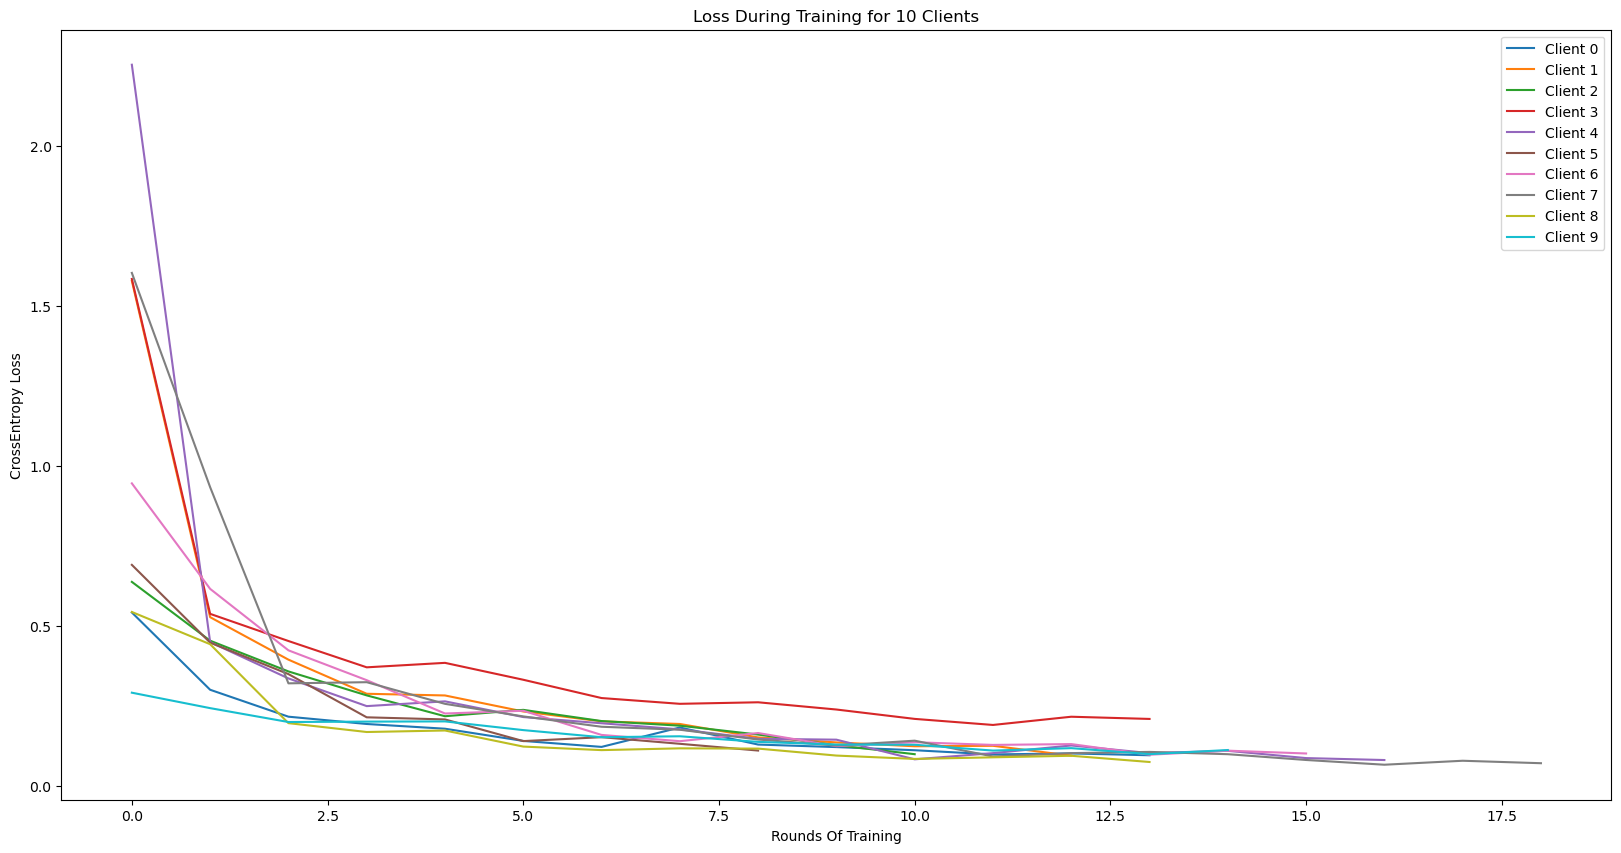

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.title("Loss During Training for 10 Clients")
plt.xlabel("Rounds Of Training")
plt.ylabel("CrossEntropy Loss")
for i in range(10):
    plt.plot(range(fa_logs[i]['rounds_num']), fa_logs[i]['losses'], label=f"Client {i}")

plt.legend()
plt.show()

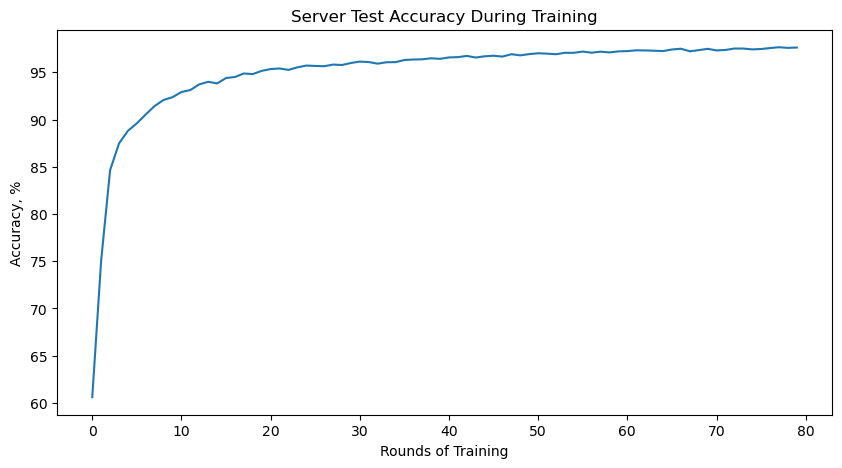

In [28]:
plt.figure(figsize=(10, 5))
plt.xlabel("Rounds of Training")
plt.ylabel("Accuracy, %")
plt.title("Server Test Accuracy During Training")
plt.plot(fa.server.logs['val_accuracy'])

plt.show()

In [3]:
sc = Scaffold(model_params={
    'input_dim': 784,
    'hidden_dim': 200,
    'output_dim': 10
}, device="cpu")
sc.prepare()

sc.train()

START TRAINING...
--------------------
Round: 1
Sending global weights to clients...
Clients training...


100%|██████████| 20/20 [00:03<00:00,  6.51it/s]


Updating global control variate...
Updating server model...
Testing server model...
Global Model Accuracy: 57.45%
--------------------
--------------------
Round: 2
Sending global weights to clients...
Clients training...


100%|██████████| 20/20 [00:02<00:00,  6.72it/s]


Updating global control variate...
Updating server model...
Testing server model...


Process SpawnPoolWorker-6:
Process SpawnPoolWorker-5:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml_39/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml_39/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml_39/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml_39/lib/python3.9/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml_39/lib/python3.9/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
Process SpawnPoolWorker-4:
Process SpawnPoolWorker-3:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml_39/lib/python

KeyboardInterrupt: 